# Linear Regression

In [ ]:
import torch
from torch.nn import Linear
import numpy as np

In [ ]:
w = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(1.0,requires_grad=True)


#y = w*x + b 
#w is slope
#b is bias/intercept

In [ ]:
def forward(x):
  y = w*x +b
  return y
  

In [ ]:
#x = torch.tensor(2)
x = torch.tensor([[4],[7]]) #to send multiple input ([[]])
forward(x)


tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

### Linear Class

In [ ]:
torch.manual_seed(1) # seed of our choice
model = Linear(in_features=1,out_features=1)
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
#y= 0.5153x - 0.4414

In [ ]:
#x = torch.tensor([2.0])
x = torch.tensor([[2.0],[3.3]])

print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [ ]:
w1 = torch.tensor(0.5153,requires_grad=True)
b1 = torch.tensor(-0.4414,requires_grad=True)


In [ ]:
def forward1(x):
  y = w1*x +b1
  return y
  

In [ ]:
forward1(x)

tensor([[0.5892],
        [1.2591]], grad_fn=<AddBackward0>)

### Custom Modules

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt


Text(0.5, 0, 'x')

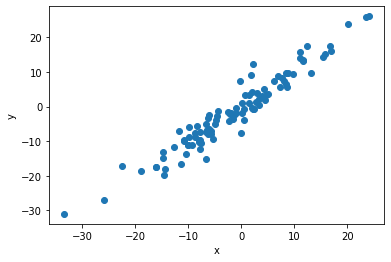

In [ ]:
X = torch.randn(100,1)*10
y = X +3 * torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [ ]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [ ]:
x2 = torch.tensor([[2.0],[3.3]])
print(model.forward(x2))               

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [ ]:
[w,b] = model.parameters()
print(w,b)
w1 = w[0][0]
b1 = b[0].item()
print(w1,b1)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
tensor(0.5153, grad_fn=<SelectBackward>) -0.44137823581695557


In [ ]:
def get_params():
  return (w[0][0].item(),b[0].item())

In [ ]:
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1= np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()


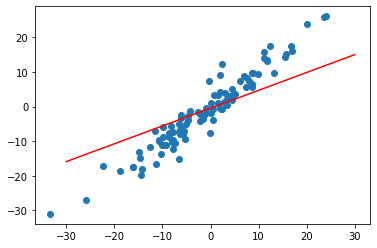

In [ ]:
plot_fit('Initial Model')

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #to update our parameters SGD (Stochastic) --> SGD will take one samples at a time so much faster

In [ ]:
epochs = 100 #Single pass to the entire dataset
losses = [] 
for i in range(epochs):   
   y_pred = model.forward(X)   
   loss = criterion(y_pred, y)   
   print("epoch:", i, "loss:", loss.item())      
   losses.append(loss)  
   optimizer.zero_grad()   
   loss.backward()   
   optimizer.step()

epoch: 0 loss: 36.448333740234375
epoch: 1 loss: 43.94552230834961
epoch: 2 loss: 53.461822509765625
epoch: 3 loss: 65.5404281616211
epoch: 4 loss: 80.8705062866211
epoch: 5 loss: 100.32701110839844
epoch: 6 loss: 125.0198745727539
epoch: 7 loss: 156.35787963867188
epoch: 8 loss: 196.1288604736328
epoch: 9 loss: 246.60162353515625
epoch: 10 loss: 310.6553955078125
epoch: 11 loss: 391.9438781738281
epoch: 12 loss: 495.1044006347656
epoch: 13 loss: 626.0213623046875
epoch: 14 loss: 792.162353515625
epoch: 15 loss: 1003.0047607421875
epoch: 16 loss: 1270.5738525390625
epoch: 17 loss: 1610.131591796875
epoch: 18 loss: 2041.0474853515625
epoch: 19 loss: 2587.8994140625
epoch: 20 loss: 3281.8857421875
epoch: 21 loss: 4162.58251953125
epoch: 22 loss: 5280.22705078125
epoch: 23 loss: 6698.5712890625
epoch: 24 loss: 8498.50390625
epoch: 25 loss: 10782.72265625
epoch: 26 loss: 13681.4970703125
epoch: 27 loss: 17360.189453125
epoch: 28 loss: 22028.625
epoch: 29 loss: 27953.0390625
epoch: 30 loss:

Text(0.5, 0, 'epoch')

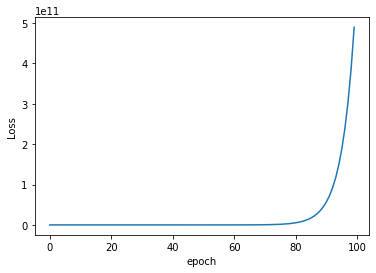

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')